# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1. There is a correlation between latitude and temperature 
2. This is a very little correlation between latitude and humidity, cloudiness, and wind speed

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

In [4]:
cities

['busselton',
 'olafsvik',
 'east london',
 'san francisco',
 'yellowknife',
 'khatanga',
 'guerrero negro',
 'vaini',
 'yantzaza',
 'rikitea',
 'jamestown',
 'kapaa',
 'saint-pierre',
 'karaul',
 'punta arenas',
 'butaritari',
 'sisimiut',
 'port elizabeth',
 'cochrane',
 'cabatuan',
 'taolanaro',
 'arraial do cabo',
 'victoria',
 'vredendal',
 'aksay',
 'cape town',
 'boa vista',
 'norsup',
 'ushuaia',
 'kruisfontein',
 'sao joao da barra',
 'rocha',
 'hermanus',
 'belmonte',
 'xuanzhou',
 'sechura',
 'bali',
 'vanimo',
 'atuona',
 'chake chake',
 'hobart',
 'saint george',
 'avarua',
 'severo-yeniseyskiy',
 'thompson',
 'mataura',
 'lagoa',
 'hamilton',
 'iqaluit',
 'dunedin',
 'pevek',
 'rivera',
 'airai',
 'karkaralinsk',
 'hofn',
 'itoman',
 'souillac',
 'adrar',
 'saint-philippe',
 'tasiilaq',
 'nikolskoye',
 'omsukchan',
 'jabinyanah',
 'oranjemund',
 'kalakamati',
 'porto novo',
 'saint anthony',
 'lata',
 'asau',
 'hilo',
 'karratha',
 'tabiauea',
 'kaitangata',
 'grand gaube

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
cities_exist = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print("Beginning Data Retrieval")
print("-------------------")
for x in range(len(cities)):
    response = requests.get(query_url + cities[x]).json()
    try:
        cities_exist.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing Record {x} | {cities[x]}")
    except:
        print("City not found. Skipping...")
        pass
print("-------------------")
print("Data Retrieval Complete")
print("-------------------")

Beginning Data Retrieval
-------------------
Processing Record 0 | busselton
Processing Record 1 | olafsvik
Processing Record 2 | east london
Processing Record 3 | san francisco
Processing Record 4 | yellowknife
Processing Record 5 | khatanga
Processing Record 6 | guerrero negro
Processing Record 7 | vaini
Processing Record 8 | yantzaza
Processing Record 9 | rikitea
Processing Record 10 | jamestown
Processing Record 11 | kapaa
Processing Record 12 | saint-pierre
City not found. Skipping...
Processing Record 14 | punta arenas
Processing Record 15 | butaritari
Processing Record 16 | sisimiut
Processing Record 17 | port elizabeth
Processing Record 18 | cochrane
Processing Record 19 | cabatuan
City not found. Skipping...
Processing Record 21 | arraial do cabo
Processing Record 22 | victoria
Processing Record 23 | vredendal
Processing Record 24 | aksay
Processing Record 25 | cape town
Processing Record 26 | boa vista
Processing Record 27 | norsup
Processing Record 28 | ushuaia
Processing Re

Processing Record 251 | pimentel
Processing Record 252 | whitehorse
Processing Record 253 | culfa
Processing Record 254 | hanting
Processing Record 255 | chowchilla
Processing Record 256 | fukue
Processing Record 257 | ixtapa
Processing Record 258 | havre-saint-pierre
Processing Record 259 | launceston
Processing Record 260 | tromso
Processing Record 261 | georgetown
Processing Record 262 | turukhansk
Processing Record 263 | shitkino
Processing Record 264 | itarema
Processing Record 265 | te anau
Processing Record 266 | glendive
Processing Record 267 | auki
Processing Record 268 | tilichiki
Processing Record 269 | wakkanai
Processing Record 270 | toba
Processing Record 271 | kangaatsiaq
Processing Record 272 | morondava
Processing Record 273 | lahij
Processing Record 274 | clarence town
Processing Record 275 | nioro
Processing Record 276 | mogzon
Processing Record 277 | lakes entrance
Processing Record 278 | katsuura
Processing Record 279 | puerto asis
Processing Record 280 | traralgon

Processing Record 499 | nuevo progreso
Processing Record 500 | saurimo
Processing Record 501 | aktash
Processing Record 502 | huarmey
Processing Record 503 | narsaq
Processing Record 504 | hobyo
Processing Record 505 | necochea
Processing Record 506 | tura
Processing Record 507 | jerome
Processing Record 508 | juneau
Processing Record 509 | luderitz
Processing Record 510 | jablanica
Processing Record 511 | kabinda
Processing Record 512 | vikhorevka
Processing Record 513 | lake jackson
City not found. Skipping...
Processing Record 515 | houma
Processing Record 516 | marsa matruh
Processing Record 517 | stromness
Processing Record 518 | mapiripan
Processing Record 519 | praya
Processing Record 520 | vestmanna
Processing Record 521 | mount isa
Processing Record 522 | sitka
Processing Record 523 | abaete
Processing Record 524 | pecos
Processing Record 525 | clyde
Processing Record 526 | bocas del toro
Processing Record 527 | provideniya
Processing Record 528 | husavik
Processing Record 529

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
with open(output_data_file, 'w') as f:
    f.write("Cities:")
    f.write('\n')
    f.write(f'{cities_exist}')
    f.write('\n')
    f.write("Latitude:")
    f.write('\n')
    f.write(f'{lat}')
    f.write('\n')
    f.write("Longitude:")
    f.write('\n')
    f.write(f'{lng}')
    f.write('\n')
    f.write("Max Temperature:")
    f.write('\n')
    f.write(f'{temp}')
    f.write('\n')
    f.write("Humidity:")
    f.write('\n')
    f.write(f'{humidity}')
    f.write('\n')
    f.write("Cloudiness:")
    f.write('\n')
    f.write(f'{cloudiness}')
    f.write('\n')
    f.write("Wind Speed:")
    f.write('\n')
    f.write(f'{wind_speed}')
    f.write('\n')
    f.write("Country:")
    f.write('\n')
    f.write(f'{country}')
    f.write('\n')
    f.write("Date:")
    f.write('\n')
    f.write(f'{date}')

In [21]:
city_dict = {
    "City": cities_exist,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
city_data = pd.DataFrame(city_dict)
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,52.09,85,73,7.76,AU,1649628490
1,Olafsvik,64.8945,-23.7142,37.71,74,100,8.88,IS,1649628491
2,East London,-33.0153,27.9116,66.00,91,100,17.52,ZA,1649628492
3,San Francisco,37.7749,-122.4194,73.31,49,75,34.52,US,1649628939
4,Yellowknife,62.4560,-114.3525,18.41,80,44,17.00,CA,1649628899


In [22]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,5.900000e+02
mean,19.359019,15.589263,58.648797,71.515254,59.544068,8.977542,1.649629e+09
std,33.658687,90.582856,23.214035,21.937222,38.982307,6.382832,2.803629e+02
min,-54.800000,-175.200000,-19.770000,1.000000,0.000000,0.000000,1.649628e+09
25%,-8.819500,-63.448125,41.747500,63.000000,20.000000,4.160000,1.649629e+09
50%,23.028800,18.658650,64.835000,77.000000,75.000000,7.115000,1.649629e+09
75%,47.512075,96.319175,77.452500,88.000000,100.000000,12.347500,1.649629e+09
max,78.218600,179.316700,95.920000,100.000000,100.000000,36.820000,1.649629e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
humid = city_data.loc[city_data["Humidity"] > 100, :]
humid.index

Int64Index([], dtype='int64')

In [ ]:
# no cities with humidity > 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

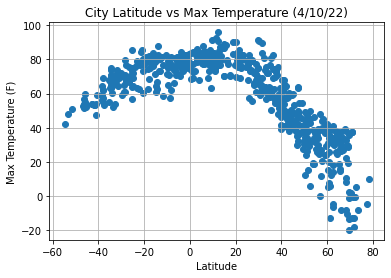

In [31]:
lat = city_data["Lat"]
temp = city_data["Max Temp"]
plt.scatter(lat, temp)
plt.title("City Latitude vs Max Temperature (4/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("LatitudeVsTemp")
plt.show()

In [ ]:
This plot shows the max temperature of cities that are located at various latitudes. The temperature increases as you get closer to the equator.

## Latitude vs. Humidity Plot

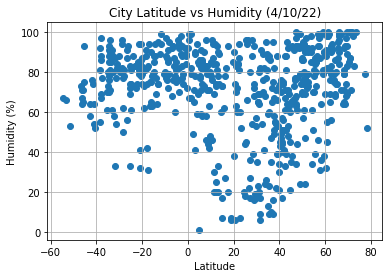

In [32]:
lat = city_data["Lat"]
temp = city_data["Humidity"]
plt.scatter(lat, temp)
plt.title("City Latitude vs Humidity (4/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("LatitudeVsHumidity")
plt.show()

In [ ]:
This plot shows the humidity of cities that are located at various latitudes. There are various humidity levels at all latitudes.

## Latitude vs. Cloudiness Plot

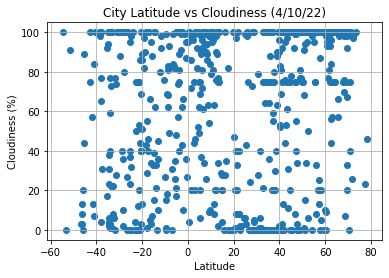

In [33]:
lat = city_data["Lat"]
temp = city_data["Cloudiness"]
plt.scatter(lat, temp)
plt.title("City Latitude vs Cloudiness (4/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("LatitudeVsCloudiness")
plt.show()

In [ ]:
This plot shows the cloudiness of cities that are located at various latitudes. There are various levels of cloudiness at all latitudes. 

## Latitude vs. Wind Speed Plot

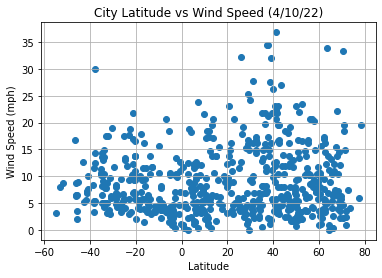

In [34]:
lat = city_data["Lat"]
temp = city_data["Wind Speed"]
plt.scatter(lat, temp)
plt.title("City Latitude vs Wind Speed (4/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("LatitudeVsWindSpeed")
plt.show()

In [ ]:
This plot shows the wind speed of cities that are located at various latitudes. There are various wind speeds at all latitudes. 

## Linear Regression

In [37]:
northern = city_data.loc[city_data["Lat"] >= 0.00, :]
southern = city_data.loc[city_data["Lat"] < 0.00, :]

The r-value is: 0.7791228261142696


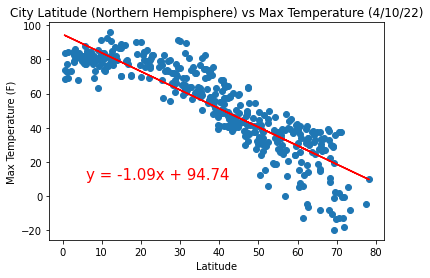

In [42]:
lat = northern["Lat"]
temp = northern["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(lat, temp)
plt.title("City Latitude (Northern Hempisphere) vs Max Temperature (4/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatitudeVsTemp(North)")
plt.show()

In [ ]:
There is a strong correlation between latitude and max temperature in the northern hempisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5208257764581559


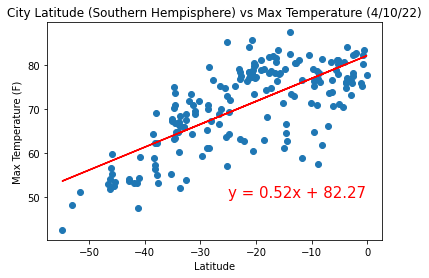

In [59]:
lat = southern["Lat"]
temp = southern["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")

plt.scatter(lat, temp)
plt.title("City Latitude (Southern Hempisphere) vs Max Temperature (4/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatitudeVsTemp(South)")
plt.show()

In [ ]:
There is a moderate correlation between latitude and max temperature in the southern hempisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04473591523219944


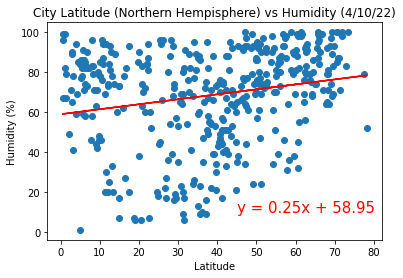

In [49]:
lat = northern["Lat"]
y_value = northern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, y_value)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

plt.scatter(lat, y_value)
plt.title("City Latitude (Northern Hempisphere) vs Humidity (4/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatitudeVsHumidity(North)")
plt.show()

In [ ]:
There is very weak correlation between latitude and humidity in the northern hempisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07955400942817722


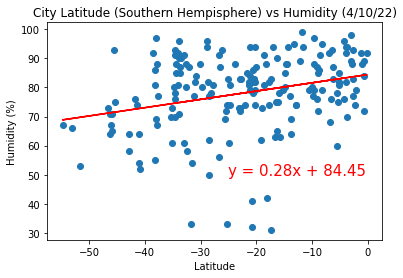

In [61]:
lat = southern["Lat"]
y_value = southern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, y_value)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")

plt.scatter(lat, y_value)
plt.title("City Latitude (Southern Hempisphere) vs Humidity (4/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatitudeVsHumidity(South)")
plt.show()

In [ ]:
There is very weak correlation between latitude and humidity in the southern hempisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03648979327528265


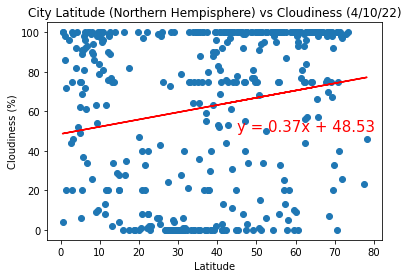

In [65]:
lat = northern["Lat"]
y_value = northern["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, y_value)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(45,50),fontsize=15,color="red")

plt.scatter(lat, y_value)
plt.title("City Latitude (Northern Hempisphere) vs Cloudiness (4/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatitudeVsCloudiness(North)")
plt.show()

In [ ]:
There is very weak correlation between latitude and cloudiness in the northern hempisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.014957739212993352


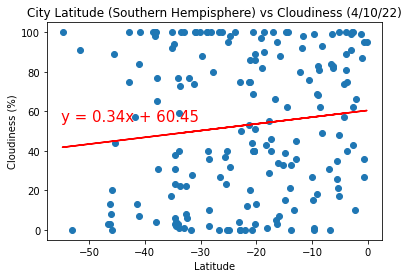

In [68]:
lat = southern["Lat"]
y_value = southern["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, y_value)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(-55,55),fontsize=15,color="red")

plt.scatter(lat, y_value)
plt.title("City Latitude (Southern Hempisphere) vs Cloudiness (4/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatitudeVsCloudiness(South)")
plt.show()

In [ ]:
There is very weak correlation between latitude and cloudiness in the southern hempisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0019706364204639436


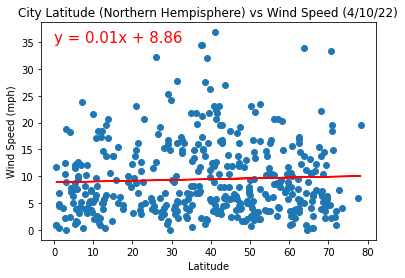

In [71]:
lat = northern["Lat"]
y_value = northern["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, y_value)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=15,color="red")

plt.scatter(lat, y_value)
plt.title("City Latitude (Northern Hempisphere) vs Wind Speed (4/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatitudeVsWindSpeed(North)")
plt.show()

In [ ]:
There is very weak correlation between latitude and wind speed in the northern hempisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.032177921260488886


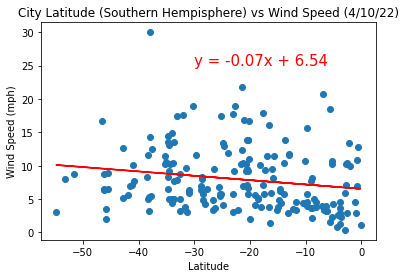

In [74]:
lat = southern["Lat"]
y_value = southern["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, y_value)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")

plt.scatter(lat, y_value)
plt.title("City Latitude (Southern Hempisphere) vs Wind Speed (4/10/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatitudeVsWindSpeed(South)")
plt.show()

In [ ]:
There is very weak correlation between latitude and wind speed in the southern hempisphere. 